In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Study hours (X) and Marks (y)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([35, 40, 50, 60, 65, 70])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [9]:
print("GOOD FIT (Linear Regression)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2 :", r2_score(y_train, y_train_pred) )

GOOD FIT (Linear Regression)
Train MSE: 1.875
Train R2 : 0.9657142857142857


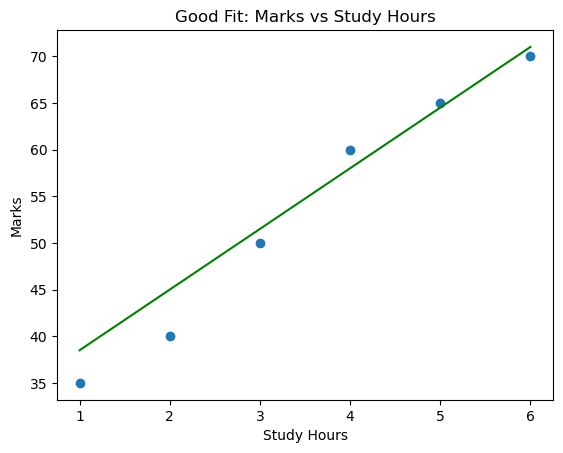

In [10]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='green')
plt.title("Good Fit: Marks vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [12]:
poly = PolynomialFeatures(degree=5)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

overfit_model = LinearRegression()
overfit_model.fit(X_train_poly, y_train)

y_train_pred_poly = overfit_model.predict(X_train_poly)
y_test_pred_poly = overfit_model.predict(X_test_poly)

In [16]:
print("Overfit (Linear Regression - Degree 5)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_poly))
print("Train R2 :", r2_score(y_train, y_train_pred_poly) )

print("\nTest MSE:", mean_squared_error(y_test, y_test_pred_poly))
print("Test R2 :", r2_score(y_test, y_test_pred_poly) )

Overfit (Linear Regression - Degree 5)
Train MSE: 8.148062248493688e-24
Train R2 : 1.0

Test MSE: 17.882879121611865
Test R2 : -1.8612606594578982


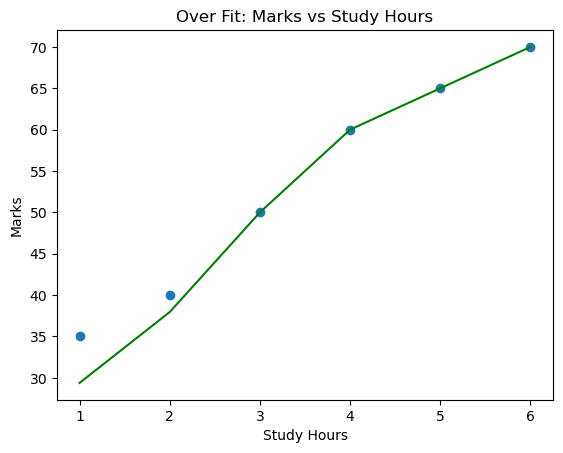

In [24]:
plt.scatter(X, y)
plt.plot(X, overfit_model.predict(poly.transform(X)), color='green')
plt.title("Over Fit: Marks vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

y_ridge_pred = ridge.predict(X_poly)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R2 :", r2_score(y, y_ridge_pred))

Ridge MSE: 0.2405805805561938
Ridge R2 : 0.9985320506949114


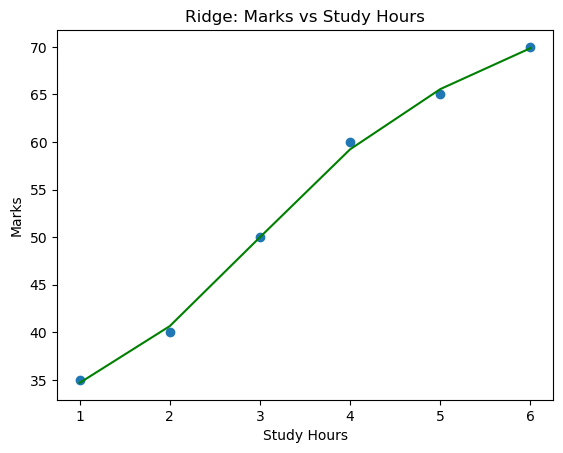

In [28]:
plt.scatter(X, y)
plt.plot(X, ridge.predict(poly.transform(X)), color='green')
plt.title("Ridge: Marks vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

y_lasso_pred = lasso.predict(X_poly)

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred) )
print("Ridge R2 :", r2_score(y, y_ridge_pred))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred) )
print("Lasso R2 :", r2_score(y, y_lasso_pred) )

Ridge MSE: 0.2405805805561938
Ridge R2 : 0.9985320506949114

Lasso MSE: 0.7727384155729755
Lasso R2 : 0.9952849859388767
